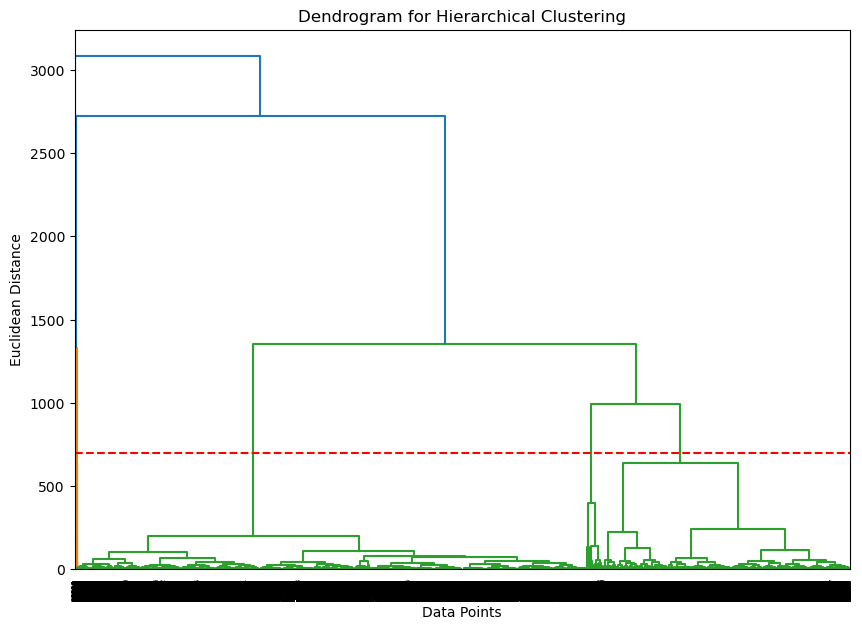

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import os
import glob
import pickle

# Define the processed folder path
processed_folder = os.path.abspath(os.path.join('..', 'data', 'processed'))

# List all test and train files
test_files = glob.glob(os.path.join(processed_folder, 'test*'))
train_files = glob.glob(os.path.join(processed_folder, 'train*'))

# Concatenate all test and train files into one DataFrame
data_train = pd.concat([pd.read_csv(file) for file in train_files], ignore_index=True)
data_test = pd.concat([pd.read_csv(file) for file in test_files], ignore_index=True)

# Perform Hierarchical Clustering
plt.figure(figsize=(10, 7))

# Generate the linkage matrix
Z = sch.linkage(data_train, method='ward')

# Create the dendrogram and plot it
dendrogram = sch.dendrogram(Z)

# Draw a horizontal line at the selected distance to represent the threshold
distance_threshold=700
plt.axhline(y=distance_threshold, color='r', linestyle='--')

plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [18]:
# Perform Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=None, distance_threshold=distance_threshold, linkage='ward')
hc.fit(data_train)

models_dir = os.path.join('..', 'models')
with open(os.path.join(models_dir, f'hierarchical_clustering_model{distance_threshold}.pkl'), 'wb') as file:
    pickle.dump(hc, file)

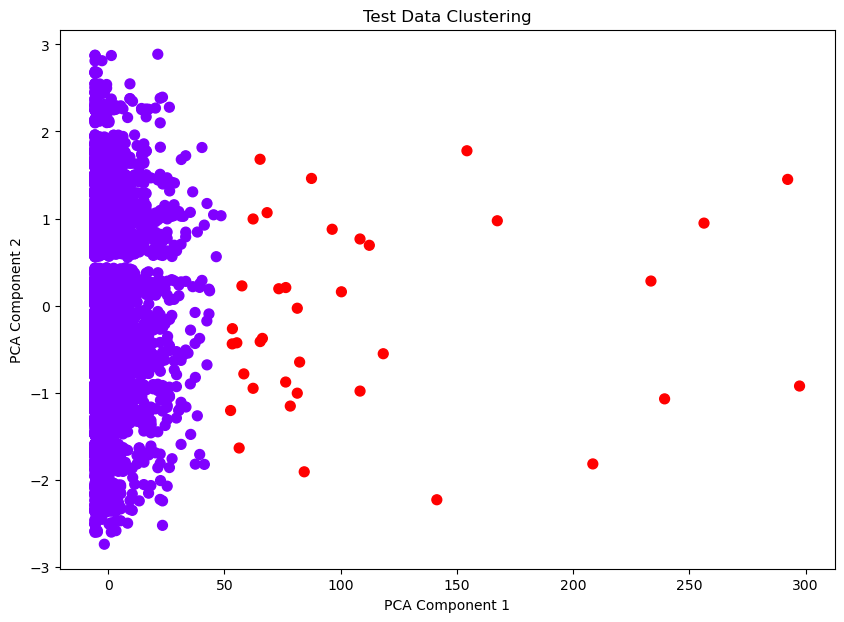

In [19]:
from sklearn.decomposition import PCA

# Predict clusters for test data
test_clusters = hc.fit_predict(data_test)

# Reduce the dimensionality of test data for plotting (using PCA for 2D plotting)
pca = PCA(n_components=2)
data_test_2d = pca.fit_transform(data_test)

# Plot the test data with different colors representing clusters
plt.figure(figsize=(10, 7))
plt.scatter(data_test_2d[:, 0], data_test_2d[:, 1], c=test_clusters, cmap='rainbow', s=50)

plt.title('Test Data Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()